## UNIVERSIDADE PRESBITERIANA MACKENZIE
#### Nome: Bianca Tieppo
#### TIA: 722.0865-1

## PIPELINE | DATASET DIGITS (NIST)
#### Classificação dos dígitos com CNN

In [2]:
# Importando as bibliotecas padrões
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Importando os datasets e as bibliotecas de métricas de performance
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import tensorflow as tf

### Importação do conjunto de dados e divisão em dados de treinamento e teste

In [3]:
mnist = tf.keras.datasets.fashion_mnist.load_data()

# Divisão dos dados em 80% de dados de treinamento e 20% de dados de teste
(X_train_full, y_train_full), (X_test, y_test) = mnist

# Transformação dos dados em um intervalo de 0 a 1
X_train_full = np.expand_dims(X_train_full, axis=-1).astype(np.float32) / 255
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1) / 255

X_train, X_valid = X_train_full[:-10000], X_train_full[-10000:]
y_train, y_valid = y_train_full[:-10000], y_train_full[-10000:]

In [4]:
X_train.shape

(50000, 28, 28, 1)

In [5]:
X_valid.shape

(10000, 28, 28, 1)

In [6]:
X_test.shape

(10000, 28, 28, 1)

### Criação, treinamento e análise do modelo

In [7]:
tf.random.set_seed(42)  # Código extra – garante a reprodutibilidade
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")
model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

In [8]:
# Código extra – compila, ajusta, avalia e usa o modelo para fazer previsões
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

model_log = model.fit(X_train, y_train, epochs=10,
                      validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 350s 221ms/step - loss: 0.7640 - accuracy: 0.7321 - val_loss: 0.3642 - val_accuracy: 0.8672
Epoch 2/10
1563/1563 [==============================] - 355s 227ms/step - loss: 0.4235 - accuracy: 0.8570 - val_loss: 0.3099 - val_accuracy: 0.8885
Epoch 3/10
1563/1563 [==============================] - 364s 233ms/step - loss: 0.3567 - accuracy: 0.8797 - val_loss: 0.3160 - val_accuracy: 0.8869
Epoch 4/10
1563/1563 [==============================] - 368s 236ms/step - loss: 0.3213 - accuracy: 0.8906 - val_loss: 0.2869 - val_accuracy: 0.8921
Epoch 5/10
1563/1563 [==============================] - 715s 457ms/step - loss: 0.2928 - accuracy: 0.9029 - val_loss: 0.2558 - val_accuracy: 0.9076
Epoch 6/10
1563/1563 [==============================] - 355s 227ms/step - loss: 0.2711 - accuracy: 0.9077 - val_loss: 0.2924 - val_accuracy: 0.8988
Epoch 7/10
1563/1563 [==============================] - 544s 348ms/step - loss: 0.2587 - accuracy: 0.9125 - val_

In [9]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

313/313 [==============================] - 17s 56ms/step - loss: 0.3472 - accuracy: 0.8873
Test loss: 0.34716230630874634
Test accuracy: 0.8873000144958496


In [10]:
predicted_cnn = model.predict(X_test)

313/313 [==============================] - 18s 55ms/step


In [11]:
predicted_cnn[0]

array([2.0529361e-21, 9.8277958e-23, 2.1756843e-19, 3.9398543e-17,
       4.7991368e-17, 2.9110842e-10, 1.7035654e-16, 5.1966785e-05,
       2.2748857e-18, 9.9994802e-01], dtype=float32)

In [12]:
np.argmax(predicted_cnn[0])

9

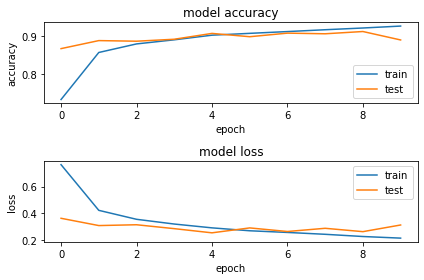

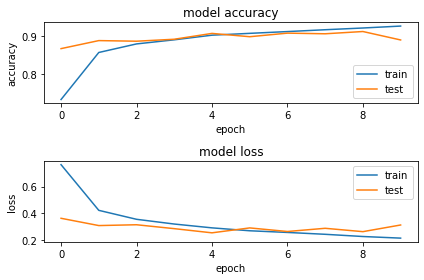

In [17]:
# Avaliação da acurácia e das perdas ao decorrer das épocas
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

O modelo apresentou bom desempenho, mas outros modelos, como KNN e Multilayer Perceptron apresentaram maior acurácia na avaliação.